# *Lecture 7*

# Root Finding and Interpolation

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Follow-up on Importance Sampling in Numerical Integration

The uncertainty of the Monte Carlo integral is proportional to the variance of the integrand $f(x)$.

$$\begin{align}
\sigma_I^2 &\simeq \frac{1}{N} \sigma_f^2 \\
&= \frac{1}{N} \left[ \frac{1}{N} \sum_{i=1}^N f_i^2 - \left( \frac{1}{N} \sum_{i=1}^N f_i \right)^2 \right]
\end{align}$$

If we want to reduce the variance of the integrand, we can divide out the dominant behavior by defining a weighting function $w(x)$ that closely matches the behavior of $f(x)$ over the interval.
We preferred a simple polynomial for $w(x)$, but this is not strictly necessary if we use acceptance/rejection methods.

Even if the integrand is very simple, like $f(x) = x^2$, there is still a variance over the interval, say $[0,b]$.
It is the variance about the mean.
How might we define $w(x)$ to make the variance smaller?
One possibility, which is almost trivial, but serves as an example, is to define $w(x)=3 x^2 / b^3$.
(Remember that $w(x)$ should be normalized over the interval.)
Then 

$$\begin{align}
f(x)/w(x) &= \frac{b^3}{3} \\
y(x) &= \frac{3}{b^3}\int_0^x x^2 \, dx' = \frac{x^3}{b^3} \\
xx(y) &= b\sqrt[3]{y}
\end{align}$$

When $y=0$, $x=0$, and when $y=1$, $x=b$, as expected.

It should be clear that the $x$ values near $b$ are sampled more often under this transform.
The sum over this sampling should match exactly the sum of $x^2$ when $x$ is sampled uniformly.

Here is an example with $a=0$ and $b=1$.

For N= 50 :  0.3333333333333335 +/- (1.2070353606474266e-25+1.971238338250362e-09j)


/Users/nielsenj/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


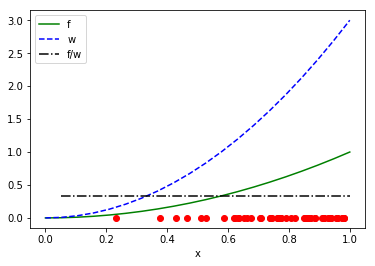

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Monte Carlo integration with importance sampling
def f(x):
    return pow(x,2)

def w(x):
    return pow(x,2)*3/pow(b,3) #+ 0.001

def xx(y): 
    return b * pow(y, 1./3.)

a = 0.
b = 1.
N = 50

xaccepted = []
sum = 0.
sum2 = 0.
for i in range(N):
    y = random.random()
    x = xx(y)
    integrand = f(x)/w(x)
    sum += integrand
    sum2 += pow(integrand,2)
    xaccepted.append(x)
result = (b-a)*sum/N
sigma = ((sum2/N - pow(sum/N,2))/N)**0.5
print("For N=", N, ": ", result, "+/-", sigma)
yvalues = np.zeros(N)

xvalues = np.linspace(0,1,20)
fvalues = f(xvalues)
wvalues = w(xvalues)
fplot, = plt.plot(xvalues, fvalues, "g")
wplot, = plt.plot(xvalues, wvalues, "b--")
ratioplot, = plt.plot(xvalues, fvalues/wvalues, "k-.")
plt.plot(xaccepted, yvalues, "ro")
plt.xlabel("x")
plt.legend([fplot, wplot, ratioplot], ['f', 'w', 'f/w'])
plt.show()

## Physics Application: Root Finding in Projectile Motion

A rocket's trajectory is given by kinematic equations of projectile motion.
Assuming a flat surface, we can calculate the vertical position $y$ of the rocket for any $x$ value:

$$y = \tan(\theta_0)\, x - \frac{g}{2 v_0^2 \cos^2 \theta}\, x^2$$

This form $y=ax + bx^2$ implies a parabolic trajectory.

We can set $y=0$ and solve for the range $x$ of the projectile.
Of course this is simple to do algebraically for this particular case, but what if there is an additional term in $y$, reflecting an additional $x$ dependent force?  That is, solve for $y=0$ in

$$y = \tan(\theta_0)\, x - \frac{g}{2 v_0^2 \cos^2 \theta}\, x^2 - 0.01 x^{1.5}$$


## Solving for Roots of Equations

Root finding for a simple 1-dimensional equation is the gateway to more complicated systems.
By "root finding," we mean finding values of $x$ for which $f(x)=0$.

Here we introduce three ways of finding roots by trial and error:
* bisection method
* Newton-Raphson method (local slope)
* secant method (local interpolation)

In all of these methods the following steps are taken:
1. Choose a trial value of $x$ (the guess)
2. Evaluate $f(x)$ at that value of $x$.  This value represents the "error" with respect to 0.
3. Use information from the error to return to step 1 or give up.

### Bisection method

In the bisection method, we bracket the root by defining an interval for which $f(x)$ is positive on one end and negative on the other.  
$f(x)$ changes sign at its root, somewhere inside this interval.

To be specific, let us say that
$f(x)$ is negative at $x_−$ and positive at $x_+$:

$$f(x_-) < 0, \quad f(x_+) > 0$$

<img src="Figures/Figure_7.1.png" width="50%">

The bisection algorithm Step 1 picks the new $x$ as the midpoint (bisection) of the interval, and defines the new interval as the half in which the sign change
occurs.
Practically, this means that one of $x_-$ or $x_+$ has to change with the redefinition of the interval, as in the following pseudocode:

       x = ( xPlus + xMinus ) / 2
       if ( f(x) f(xPlus) > 0 ) xPlus = x
          else xMinus = x

This process continues until the value of $f(x)$ is less than a
predefined level of precision or until a predefined (large) number of
subdivisions occurs.

The following code snippet implements the bisection algorithm to find the root of $f(x) = 2\cos(x) - x$:

In [2]:
# Root finding with bisection method
def f(x):                                      # Test function
    return 2*cos(x)-x

def bisection(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and f(x) = %9.6f" % (it, x, f(x)))
        if (f(xplus)*f(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x  

eps=1e-6
a=0.0
b=7.0
Nmax=100
root=bisection(a, b, Nmax, eps)
print("Root =",root)

iteration  0: x = 3.500000 and f(x) = -5.372913
iteration  1: x = 1.750000 and f(x) = -2.106492
iteration  2: x = 0.875000 and f(x) =  0.406994
iteration  3: x = 1.312500 and f(x) = -0.801632
iteration  4: x = 1.093750 and f(x) = -0.175435
iteration  5: x = 0.984375 and f(x) =  0.122393
iteration  6: x = 1.039062 and f(x) = -0.025005
iteration  7: x = 1.011719 and f(x) =  0.049090
iteration  8: x = 1.025391 and f(x) =  0.012139
iteration  9: x = 1.032227 and f(x) = -0.006409
iteration 10: x = 1.028809 and f(x) =  0.002871
iteration 11: x = 1.030518 and f(x) = -0.001767
iteration 12: x = 1.029663 and f(x) =  0.000552
iteration 13: x = 1.030090 and f(x) = -0.000608
iteration 14: x = 1.029877 and f(x) = -0.000028
iteration 15: x = 1.029770 and f(x) =  0.000262
iteration 16: x = 1.029823 and f(x) =  0.000117
iteration 17: x = 1.029850 and f(x) =  0.000045
iteration 18: x = 1.029863 and f(x) =  0.000009
iteration 19: x = 1.029870 and f(x) = -0.000010
iteration 20: x = 1.029867 and f(x) = -0

We can apply this method to the physics application above (projectile motion).
First we try with the simple quadratic equation, and then with the more complicated expression for $y$:

In [139]:
# Projectile motion application
# Root finding with bisection method
def y(x):                                      # Test function
    g = 9.8
    v0 = 40.
    theta = 45. * np.pi/180.
    return np.tan(theta)*x - g/(2*pow(v0*np.cos(theta),2))*x*x
#    return np.tan(theta)*x - g/(2*pow(v0*np.cos(theta),2))*x*x - 0.01*pow(x,1.5)

def bisection(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and y(x) = %9.6f" % (it, x, y(x)))
        if (y(xplus)*y(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x  

eps=1e-6
a=0.
b=500.
Nmax=100
root=bisection(a, b, Nmax, eps)
print("Root =",root)

iteration  0: x = 250.000000 and y(x) = -132.812500
iteration  1: x = 125.000000 and y(x) = 29.296875
iteration  2: x = 187.500000 and y(x) = -27.832031
iteration  3: x = 156.250000 and y(x) =  6.713867
iteration  4: x = 171.875000 and y(x) = -9.063721
iteration  5: x = 164.062500 and y(x) = -0.801086
iteration  6: x = 160.156250 and y(x) =  3.049850
iteration  7: x = 162.109375 and y(x) =  1.147747
iteration  8: x = 163.085938 and y(x) =  0.179172
iteration  9: x = 163.574219 and y(x) = -0.309497
iteration 10: x = 163.330078 and y(x) = -0.064798
iteration 11: x = 163.208008 and y(x) =  0.057278
iteration 12: x = 163.269043 and y(x) = -0.003737
iteration 13: x = 163.238525 and y(x) =  0.026776
iteration 14: x = 163.253784 and y(x) =  0.011521
iteration 15: x = 163.261414 and y(x) =  0.003892
iteration 16: x = 163.265228 and y(x) =  0.000078
iteration 17: x = 163.267136 and y(x) = -0.001830
iteration 18: x = 163.266182 and y(x) = -0.000876
iteration 19: x = 163.265705 and y(x) = -0.0003

Check to see that the result matches the range for the projectile:
$$d = \frac{v_0}{g} \sin(2\theta)$$

### Physics Example: Quantum Energy Levels in Finite Square Well

Standard problem in quantum mechanics: solve for the energies of a particle
of mass $m$ bound within a 1-D square well of radius $a$:

$$
V(x) 
=\begin{cases}
    -V_0, & \mbox{for } |x| \leq a    \\
  0, & \mbox{for }  |x| \geq a
\end{cases}
$$

As shown in quantum mechanics texts, the energies of the bound states $E = −E_B < 0$ within this well are solutions of the transcendental equations

$$\begin{align}
\sqrt{10-E_B}  \tan\left(\sqrt{10-E_B}\right) & =  \sqrt{E_B}
\quad
\mbox{(even)},\\
\sqrt{10-E_B}\ \ \mbox{cotan}\left(\sqrt{10-E_B}\right)& =
\sqrt{E_B}\quad \mbox{(odd)}
\end{align}$$

where even and odd refer to the symmetry of the wave function. Here we have chosen units such that $\hbar = 1$, $2m = 1$, $a = 1$, and $V_0 = 10$.

This kind of equation 

$$\sqrt{10-E} \tan(\sqrt{10-E})-\sqrt{E} = 0$$

or, equivalently,

$$\sqrt{E} \cot(\sqrt{10-E})-\sqrt{10-E} = 0$$

can be solved numerically for the allowed values of $E$.

It is always a good idea to check the function visually, just to get some idea of the behavior.  Do not be fooled by the extra apparent zeros that are an artifact of the plotting functions!

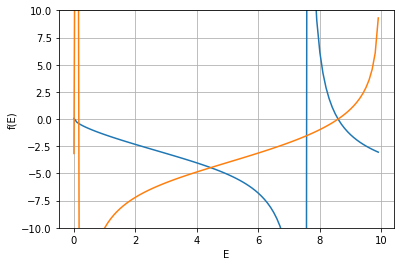

In [140]:
def f(E):
    return np.sqrt(10.-E)*np.tan(np.sqrt(10.-E))-np.sqrt(E)

def g(E):
    return np.sqrt(E)/np.tan(np.sqrt(10.-E)) - np.sqrt(10.-E)

E_values = []
f_values = []
g_values = []
for E in np.linspace(0., 9.9, 100):
    E_values.append(E)
    f_values.append(f(E))
    g_values.append(g(E))
plt.plot(E_values, f_values)
plt.plot(E_values, g_values)
#plt.plot(E_values, f_values, "ro")
#plt.plot(E_values, g_values, "bo")
plt.ylim(-10.,10.)
plt.xlabel("E")
plt.ylabel("f(E)")
plt.grid()
plt.show()

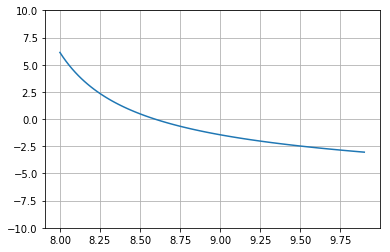

In [63]:
E_values = []
f_values = []
for E in np.linspace(8., 9.9, 100):
    E_values.append(E)
    f_values.append(f(E))
plt.plot(E_values, f_values)
plt.ylim(-10.,10.)
plt.grid()
plt.show()

Now we are ready to use the bisection method to find the zeros of $f(E)$.

In [62]:
def bisection(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and y(x) = %9.6f" % (it, x, f(x)))
        if (f(xplus)*f(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision eps = %e" % eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x  

bisection(8.2,9.0,100,1e-04)

iteration  0: x = 8.600000 and y(x) = -0.034165
iteration  1: x = 8.400000 and y(x) =  1.107187
iteration  2: x = 8.500000 and y(x) =  0.481307
iteration  3: x = 8.550000 and y(x) =  0.211801
iteration  4: x = 8.575000 and y(x) =  0.086087
iteration  5: x = 8.587500 and y(x) =  0.025302
iteration  6: x = 8.593750 and y(x) = -0.004593
iteration  7: x = 8.590625 and y(x) =  0.010314
iteration  8: x = 8.592187 and y(x) =  0.002850
iteration  9: x = 8.592969 and y(x) = -0.000874
iteration 10: x = 8.592578 and y(x) =  0.000987
iteration 11: x = 8.592773 and y(x) =  0.000056
iteration 12: x = 8.592871 and y(x) = -0.000409
root found with precision eps = 1.000000e-04


8.59287109375

### Newton-Raphson Method

The Newton-Raphson method uses information from the function itself, not just at the sign crossing, to estimate more accurately where exactly the sign crossing will happen.

This algorithm is the equivalent of drawing a straight line $f(x) = mx+b$
tangent to the curve and then using the
intercept of the line with the $x$ axis at $x = −b/m$ as an improved guess
for the root. 
The process continues until some set level of
precision is reached. If a guess is in a region where $f(x)$ is nearly linear, then the convergence is much more rapid than for the bisection algorithm.

The analytic formulation of the Newton-Raphson algorithm starts with an old
guess $x_0$ and expresses a new guess $x$ as a correction $\Delta x$ to
the old guess:

$$
\begin{align}
  x_0 & =  \mbox{old guess},\quad
  \Delta x = \mbox{unknown correction} \\
    \Rightarrow\quad x & =  x_0 + \Delta x = \mbox{(unknown) new guess}
\end{align}
$$

We next expand the known function $f(x)$ in a Taylor series around
$x_0$ and keep only the linear terms:

$$f(x = x_0 + \Delta x) \simeq f(x_0) + \left. \frac{d f}
{dx}\right|_{x_0} \Delta x$$

We then determine the correction $\Delta x$ by calculating the point at which this
linear approximation to $f(x)$ crosses the $x$ axis:

$$\begin{align}
  f(x_0) + \left. \frac{d f} {dx}\right|_{x_0} \Delta x  & = 0 ,\\
 \Rightarrow  \quad   \Delta x & = - \frac{f(x_0)} {  \left. {(df /
    dx)}\right|_{x_0}}
\end{align}$$

The procedure is repeated starting at the improved $x$ until some desired
level of precision is obtained.

<img src="Figures/Figure_7.2.png" width="50%">

The advantage of this method is that it can converge faster than the simpler bisection method.

The disadvantages of this method are
1. It requires you to calculate the derivative of the function in addition to the function itself.  This implies analytic differentation or numerical differentiation.
2. It may fail for a rapidly-varying function, if the straight-line extrapolation to the $x$-axis jumps over the zero to another point with the same-sign derivative.

To mitigate disadvantage \#1, we can calculate the forward difference derivative
$$\frac{d f} {d x} \simeq \frac{f (x + \delta x) - f (x)}{\delta x}$$
so that we can re-use the evaluation $f(x)$ that we already performed.

This should be more straightforward than using the central difference derivative.

In the following example, we return to our original test function $f(x) = 2\cos(x) -x$.

In [47]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed 
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# NewtonCD.py    Newton-Raphson Search with forward difference
import numpy as np

x = 4.
dx = 3.e-1
eps = 0.0001
imax = 100                                        # Max no of iterations

def f(x):                                                     # Function
    return 2*np.cos(x) - x

for it in range(0, imax + 1):
    F = f(x)
    if ( abs(F) <= eps ):                         # Check for convergence
        print("Root found at x = %.5f, F = %.5e, tolerance eps = %e" % (x, F, eps)) 
        break
    print("Iteration ", it, " x = ", x, " f(x) = ", F)
    df = (f(x + dx) - f(x))/dx                            # Forward difference
    dx = - F/df 
    x += dx                                               # New guess

Iteration  0  x =  4.0  f(x) =  -5.307287241727224
Iteration  1  x =  11.740749215681033  f(x) =  -10.384548440431919
Iteration  2  x =  0.9987770197629118  f(x) =  0.08388498810969591
Iteration  3  x =  1.1148991974395954  f(x) =  -0.23436321106717994
Iteration  4  x =  1.0324572710157693  f(x) =  -0.007035917319504259
Iteration  5  x =  1.0298249880685695  f(x) =  0.00011276120515502086
Root found at x = 1.02987, F = -5.73114e-08, tolerance eps = 1.000000e-04


Notice how much more quickly this method converges than the bisection method.

### Secant Method

In the secant method, a line is drawn between the function values at the end of the interval.

<img src="Figures/Secant_Method.png" width="50%">

This line intersects the $x$ axis at some point, and that becomes the next best estimate of the zero-crossing.
This successive approach repeats until $f(x)$ is within $\epsilon$ of 0.

### Hybrid Method

You can put together a method that combines the best of the bisection method and the Newton-Raphson method.

1. Identify the interval for zero-crossing, as for the bisection method.  The edges of the interval are a hard boundary for the Newton-Raphson method.
2. If the Newton-Raphson method tries to go beyond these boundaries, set $x$ to the boundary and continue.

This method prevents the Newton-Raphson method from following a derivative too far away from the zero-crossing.
Apparently this hybrid method is known to some as [Dekker's method](https://en.wikipedia.org/wiki/Brent%27s_method#Dekker.27s_method).

### Exploration: What Happens as $V_0$ increases?

Let's return to the energy levels in our finite 1-D square well.
Vary $V_0$ and check the energy solution(s) $E$ as a function of $V_0$.
* Does it match your expectation?
* Which $n$ values are represented?
* Make $V_0$ very large.  Do the results match your expectations?
* Do you find any limitations to the methods?

/Users/nielsenj/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


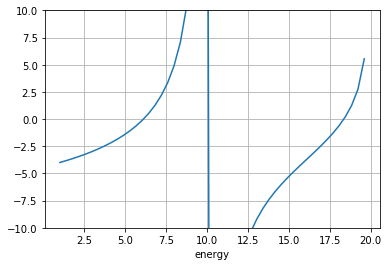

iteration  0: x = 5.500000 and f(x) = -0.825070
iteration  1: x = 7.750000 and f(x) =  3.931898
iteration  2: x = 6.625000 and f(x) =  0.884549
iteration  3: x = 6.062500 and f(x) = -0.069426
iteration  4: x = 6.343750 and f(x) =  0.377420
iteration  5: x = 6.203125 and f(x) =  0.147250
iteration  6: x = 6.132812 and f(x) =  0.037312
iteration  7: x = 6.097656 and f(x) = -0.016447
iteration  8: x = 6.115234 and f(x) =  0.010333
iteration  9: x = 6.106445 and f(x) = -0.003081
iteration 10: x = 6.110840 and f(x) =  0.003620
iteration 11: x = 6.108643 and f(x) =  0.000268
iteration 12: x = 6.107544 and f(x) = -0.001407
iteration 13: x = 6.108093 and f(x) = -0.000570
iteration 14: x = 6.108368 and f(x) = -0.000151
iteration 15: x = 6.108505 and f(x) =  0.000058
iteration 16: x = 6.108437 and f(x) = -0.000046
root found with precision eps =  0.0001
iteration  0: x = 15.000000 and f(x) = -5.274759
iteration  1: x = 17.500000 and f(x) = -1.624406
iteration  2: x = 18.750000 and f(x) =  0.9884

18.360519409179688

In [141]:
def f(V, E):
    return np.sqrt(V-E)*np.tan(np.sqrt(V-E)) - np.sqrt(E)

def g(V, E):
    return np.sqrt(E)/np.tan(np.sqrt(V-E)) - np.sqrt(V-E)

V = 20. # vary this number to see effects on energy levels
E_values = []
g_values = []
for E in np.linspace(1, V, 50):
    E_values.append(E)
    g_values.append(g(V, E))
plt.plot(E_values, g_values)
plt.ylim(-10.,10.)
plt.xlabel('energy')
plt.grid()
plt.show()

def bisection2(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and f(x) = %9.6f" % (it, x, g(V,x)))
        if (g(V, xplus)*g(V, x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x  

bisection2(1., V/2, Nmax, 1e-04)
bisection2(V/2, V, Nmax, 1e-04)

## Physics Application: Interpolation of Cross Sections

This table gives experimental values for a scattering cross section ($f(E)$
in the theory), each with absolute error $\pm\sigma_i$, as a function of
energy ($x_i$ in the theory).

|$i=$ | 1|2|3|4|5|6|7|8|9|
|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|
|$E_i$ (MeV) |0|25|50|75|100|125|150|175|200|
| $g(E_i)$(mb)|10.6|16.0|45.0|83.5|52.8|19.9|10.8|8.25|4.7|
| Error (mb)|9.34|17.9 |41.5 |85.5|51.5|21.5|10.8 |6.29 |4.14|

When we interpolate data, we simply want to know the value of $f(x)$ at some point between the given $x$ values, regardless of the error on each value.
We call
the independent variable $x$ and its tabulated values
$x_i (i= 1,2, \ldots)$, and we assume that the dependent variable is the
function $g(x)$, with tabulated values $g_i = g(x_i)$. 

### Lagrange Polynomial Global Interpolation
Given $N$ data points, we will assume that $g(x)$ can be approximated as a $(N-1)$-degree polynomial over the entire interval.
Why is this at all reasonable?

Now consider the expansion of a function at two points $x_1$ and $x_2$.  We would like to express the values of the function at those points in terms of the function and derivative at another point $x$.  The reason for this approach is that we already know the values $f(x_1)$ and $f(x_2)$; we want to find $f(x)$ and $f'(x)$ for other $x$.
$$\begin{align}
f(x_1) &= f(x) + (x_1 - x) f'(x) + \cdots \\
f(x_2) &= f(x) + (x_2 - x) f'(x) + \cdots
\end{align}$$

For the purposes of interpolation and fitting, we would like to *approximate* the true function with an approximate polynomial function $p(x)$.  Because this $p(x)$ is a new function, we can define it in such a way that it satisfies the equality, without approximation.
$$\begin{align}
f(x_1) &= p(x) + (x_1 - x) p'(x) \\
f(x_2) &= p(x) + (x_2 - x) p'(x)
\end{align}$$

These equations are two equations in two unknowns ($p$ and $p'$), with solution

$$
p(x) = \frac{x-x_2}{x_1-x_2} f(x_1) + \frac{x-x_1}{x_2-x_1} f(x_2)
$$

If you look closely, you'll realize that this is the equation for a line through the points $(x_1, f(x_1))$ and $(x_2, f(x_2))$.
It corresponds to the assumption that the function $f$ can be approximated as a straight line in the interval $[x_1, x_2]$.
The statement might be, "For $N=2$ points, the function can be approximated as a polynomial of order $N-1=1$."

To extend this idea to higher orders, we add more terms in the series expansion.  Each additional term brings a new equation and the possibility to solve for a new higher-order derivative.  For example, the equations

$$\begin{align}
f(x_1) &= p(x) + (x_1 - x) p'(x) + \frac{(x_1 -x )^2}{2} p''(x) \cdots \\
f(x_2) &= p(x) + (x_2 - x) p'(x) + \frac{(x_2 -x )^2}{2} p''(x) \cdots \\
f(x_3) &= p(x) + (x_3 - x) p'(x) + \frac{(x_3 -x )^2}{2} p''(x) \cdots
\end{align}$$

yield the solution

$$
p(x) = \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}\ f(x_1) + \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}\ f(x_2) + \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}\ f(x_3)
$$

This is the unique quadratic polynomial that passes through all three points.

The general formula for the Lagrange polynomial of order $N-1$ is:

$$\begin{align}
g(x) &\simeq  g_{1}\lambda_{1}(x) + g_{2}\lambda_{2}(x) + \cdots +
g_{n}\lambda_{n}(x),\\
\lambda_{i}(x) & =  \prod_{j (\neq i)=1}^{n}
\frac{x-x_{j}}{x_{i}-x_{j}} = \frac{x-x_1} { x_i-x_1} \frac{x-x_2}
{ x_i-x_2} \cdots \frac{x-x_n} { x_i-x_n}
\end{align}$$

Remember that the coefficients $g_i$ are the tabulated (known) values $g(x_i)$ for specific points $x_i$.

Let's try an example now, with real numbers.

Assume we are given the points and function values

$$x_{1-4}  = (0 ,1 ,2, 4) \qquad  g_{1-4}  =(-12,-12,-24,-60)$$

With four points, the Lagrange formula determines a third-order
polynomial that reproduces each of the tabulated values:

$$\begin{align}
g(x) &=  \frac{(x-1)(x-2)(x-4)}{(0-1)(0-2)(0-4)}(-12) +
\frac{x(x-2)(x-4)}{(1-0)(1-2)(1-4)}(-12)  \\
&+ \frac{x(x-1)(x-4)}{(2-0)(2-1)(2-4)}(-24) +
\frac{x(x-1)(x-2)}{(4-0)(4-1)(4-2)}(-60),  \\
\Rightarrow \quad g(x) &=  x^{3} - 9x^{2} + 8x -12
\end{align}$$

Keep in mind that the polynomial is only guaranteed to pass through the given points; its behavior everywhere else may be erratic.
For an example, see the 8th-order polynomial function fit to the 9 points in the figure.

<img src="Figures/Figure_7.5.png" width="60%">


### Natural Cubic Spline Local Interpolation

A sophisticated variation of an $n=4$ interpolation, known as *cubic
splines*, often leads to surprisingly eye-pleasing fits. In this
approach, cubic polynomials are fit to the function ** separately in each local
interval**, with the additional constraint that the first and second
derivatives of the polynomials be continuous from one interval to the
next. This continuity of slope and curvature is what makes the spline
fit particularly pleasing to the eye.

The series of cubic polynomials obtained by spline-fitting a table of
data can be integrated and differentiated and is guaranteed to have
well-behaved derivatives. The existence of meaningful derivatives is an
important consideration. As a case in point, if the interpolated
function is a potential, you can take the derivative to obtain the
force.
It is not easy to solve the equations and satisfy the matching conditions simultaneously, unless you have a computer!

The basic form of the cubic spline is

$$
g_{i}(x) =  g_{i} +g_i^\prime (x-x_{i})
+\frac{1}{2} g_{i}^{\prime\prime}(x-x_{i})^{2}
+\frac{1}{6}g_{i}^{\prime\prime\prime}(x-x_{i})^{3}
$$ 

but then additional conditions are needed to ensure continuity of the function and of the first and second derivatives.  

The matching of the first *and* second derivatives at each interval’s
boundaries provides the equations

$$
g_{i-1}^\prime (x_{i}) = g_i^\prime(x_{i}), \quad g_{i-1}^{\prime\prime}(x_{i}) =
g_{i}^{\prime\prime}(x_{i})
$$

The additional equations needed to determine all constants is obtained
by matching the third derivatives at adjacent nodes. Values for the
third derivatives are found by approximating them in terms of the second
derivatives:

$$
g_{i}''' \simeq \frac{g_{i+1}'' - g_{i}''}{x_{i+1} - x_{i}}
$$

Even these constraints are not enough to solve for all of the unknowns: the matching at the boundaries provides only $N-2$ equations for $N$ unknowns.
The remaining constraints come from boundary conditions at the edge of the interval.
For the "natural" spline, the boundary conditions are chosen to be:

$$g''(a) = g''(b) = 0$$

(They were already required to be equal; in this case they are required to be 0.)

### Implementation

The implementation below follows a more efficient but less transparent algorithm, based on the algorithms in the *Numerical Recipes* chapter, "Interpolation and Extrapolation."  You are free to adapt this code for any fitting problems.

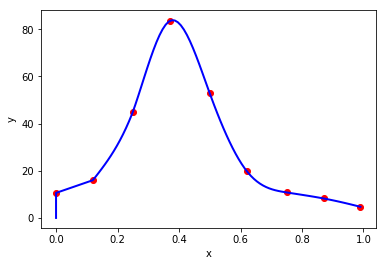

In [92]:
# Cubic Spline Interpolation
# Adapted from Landau et al.

x = np.array([0., 0.12, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 0.99])    # input
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
n = 9 # number of data points
Nfit = 100 # number of evaluation points for plot

y2 = np.zeros((n), float)
u = np.zeros((n), float)

# output fit values
xout = np.zeros((Nfit+2), float)
yout = np.zeros((Nfit+2), float)

fig,ax = plt.subplots()
ax.plot(x, y, 'ro')

# Filling polynomial sequence for all n, with special case for n=1
yp1 = (y[1]-y[0])/(x[1]-x[0]) - (y[2]-y[1])/(x[2]-x[1]) + (y[2]-y[0])/(x[2]-x[0])
ypn = (y[n-1]-y[n-2])/(x[n-1]-x[n-2]) - (y[n-2]-y[n-3])/(x[n-2]-x[n-3]) + \
      (y[n-1]-y[n-3])/(x[n-1]-x[n-3])

# This block uses decomposition method to solve the tridiagonal system of N equations
for i in range(1, n - 1):
        sig = (x[i] - x[i - 1])/(x[i + 1] - x[i - 1]) 
        p = sig*y2[i - 1] + 2. 
        y2[i] = (sig - 1.)/p 
        u[i] = (y[i+1] - y[i])/(x[i+1] - x[i]) - (y[i] - y[i-1])/(x[i] - x[i-1]) 
        u[i] = (6.*u[i]/(x[i + 1] - x[i - 1]) - sig*u[i - 1])/p
        qn=0.5
        un=(3/(x[n-1]-x[n-2]))*(ypn-(y[n-1]-y[n-2])/(x[n-1]-x[n-2]))

y2[n - 1] = (un - qn*u[n - 2])/(qn*y2[n - 2] + 1.)

for k in range(n - 2, 1,  - 1):
        y2[k] = y2[k]*y2[k + 1] + u[k]

for i in range(1, Nfit + 2):            # initialization ends, begin fit
        xout[i] = x[0] + (x[n - 1] - x[0])*(i - 1)/(Nfit) 
        # Bisection algorithm to find the correct interval for this xout
        klo = 0;    khi = n - 1         
        while (khi - klo >1):
            k = (khi + klo) >> 1
            if (x[k] > xout[i]): 
                khi  = k
            else: 
                klo = k
        h = x[khi] - x[klo] 
        if (x[k] > xout[i]):  
            khi = k
        else: 
            klo = k 
        h = x[khi] - x[klo]
        a = (x[khi] - xout[i])/h 
        b = (xout[i] - x[klo])/h
        # This is the implementation of the spline itself
        yy = (a*y[klo]+b*y[khi] + ((a**3-a)*y2[klo] + 
                 (b**3-b)*y2[khi])*(h*h)/6.)
        yout[i]=yy
ax.plot(xout,yout,'b',lw=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Python Implementations

For completeness, we provide the references to the corresponding SciPy routines.

### Root-Finding Routines

The simple Newton-Raphson method is implemented as `scipy.optimize.newton`.  See 
[scipy.optimize reference guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
This implementation requires a preliminary guess that is not too far away from the actual zero.

In [101]:
from scipy.optimize import newton
def y(x): # Test function, projectile motion
    g = 9.8
    v0 = 40.
    theta = 45. * np.pi/180.
    return np.tan(theta)*x - g/(2*pow(v0*np.cos(theta),2))*x*x

preliminary_guess = 120.
root = newton(y, preliminary_guess)
print(root)

163.26530612244898


But be careful!  These root-finding methods can get confused.  Plotting the function, if you can, is always a good check.  Other root finders in `scipy.optimize` are most robust and complicated.

6.108467017547628
18.36051985246666
6.10846701754763
18.360519852466716


/Users/nielsenj/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


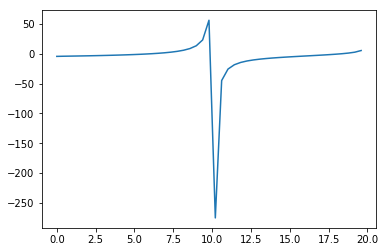

In [132]:
def g(E): # test function, finite square well
    V = 20
    return np.sqrt(E)/np.tan(np.sqrt(V-E)) - np.sqrt(V-E)

print(newton(g, 5.))
print(newton(g, 18.))
print(newton(g, 10.))
print(newton(g, 11.))

new_xvalues = np.linspace(0,20)
new_fvalues = g(new_xvalues)
plt.plot(new_xvalues, new_fvalues)
plt.show()

### Cubic Spline Fitting Routines

The cubic spline fitting routine is implemented as `scipy.interpolate.CubicSpline`.  See
[scipy.interpolate reference guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) for more details and default values.

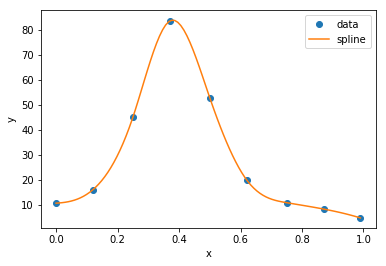

In [98]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, y) # same table of tabulated values
plt.plot(x, y, 'o', label='data')
plt.plot(xout, cs(xout), label='spline')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()